In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("stock_prices.csv")

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2013-01-02,7.000,7.09,6.942,7.072,5974000
1,2013-01-03,7.036,7.09,6.950,6.954,3710000
2,2013-01-04,6.960,6.96,6.784,6.880,3370000
3,2013-01-07,6.960,6.96,6.780,6.868,2210000
4,2013-01-08,6.900,6.90,6.622,6.736,6420000


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df = df.resample('D').bfill()

In [11]:
df.head(15)

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,7.000,7.090,6.942,7.072,5974000
2013-01-03,7.036,7.090,6.950,6.954,3710000
2013-01-04,6.960,6.960,6.784,6.880,3370000
2013-01-05,6.960,6.960,6.780,6.868,2210000
2013-01-06,6.960,6.960,6.780,6.868,2210000
2013-01-07,6.960,6.960,6.780,6.868,2210000
2013-01-08,6.900,6.900,6.622,6.736,6420000
2013-01-09,6.802,6.838,6.680,6.728,3490000
2013-01-10,6.774,6.798,6.676,6.706,4612500


In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03
mean,114.217165,116.820811,111.536718,114.350878,3.933797e+07
std,177.334219,181.374909,172.759242,177.298435,2.786740e+07
min,6.616000,6.676000,6.422000,6.582000,2.201000e+06
25%,41.810001,42.750000,41.265999,41.798000,2.162820e+07
50%,50.835999,51.669998,49.933998,50.750000,3.152700e+07
75%,68.540001,69.500000,67.141998,68.503998,4.763200e+07
max,891.380005,900.400024,871.599976,883.090027,3.046940e+08


<AxesSubplot:xlabel='Date'>

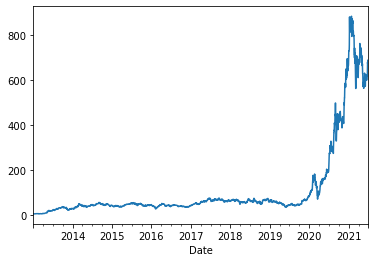

In [13]:
df['Close'].plot()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3101 entries, 2013-01-02 to 2021-06-29
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3101 non-null   float64
 1   High    3101 non-null   float64
 2   Low     3101 non-null   float64
 3   Close   3101 non-null   float64
 4   Volume  3101 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 145.4 KB


In [15]:
df.Close.isnull().sum()

0

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adfuller_test(series):
    result =adfuller(series)
    lables = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, lables):
        print(label+ ' :'+str(value))
    if result[1]<=0.05:
        print('Null hypothesis: Stationary data')
    else:
        print('Alternate Hypothesis: Non-stationary data')

In [18]:
adfuller_test(df.Close)

ADF Test Statistic :1.1782257405346708
p-value :0.9958319364285854
#Lags Used :28
Number of observations Used :3072
Alternate Hypothesis: Non-stationary data


In [19]:
df['Close_first_diff'] = df['Close']-df['Close'].shift(1)

In [20]:
#df['Close_first_diff'] = df['Close']-df['Close'].shift(6)

In [21]:
df.head()

,Open,High,Low,Close,Volume,Close_first_diff
Date,,,,,,
2013-01-02,7.000,7.09,6.942,7.072,5974000,NaN
2013-01-03,7.036,7.09,6.950,6.954,3710000,-0.118
2013-01-04,6.960,6.96,6.784,6.880,3370000,-0.074
2013-01-05,6.960,6.96,6.780,6.868,2210000,-0.012
2013-01-06,6.960,6.96,6.780,6.868,2210000,0.000


In [22]:
df.tail()

,Open,High,Low,Close,Volume,Close_first_diff
Date,,,,,,
2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700,-7.950012
2021-06-26,671.640015,694.700012,670.320007,688.719971,21628200,16.849976
2021-06-27,671.640015,694.700012,670.320007,688.719971,21628200,0.000000
2021-06-28,671.640015,694.700012,670.320007,688.719971,21628200,0.000000
2021-06-29,684.650024,687.510010,675.890015,680.760010,17381300,-7.959961


<AxesSubplot:xlabel='Date'>

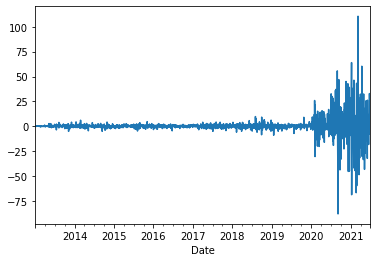

In [23]:
df.Close_first_diff.plot()

In [24]:
adfuller_test(df.Close_first_diff.dropna())

ADF Test Statistic :-10.884877610682677
p-value :1.26743267255068e-19
#Lags Used :27
Number of observations Used :3072
Null hypothesis: Stationary data


In [25]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

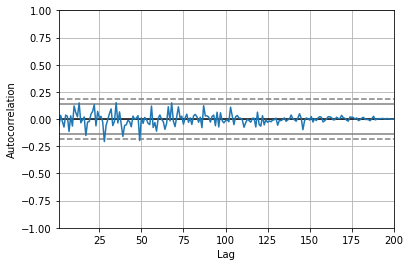

In [26]:
autocorrelation_plot(df.Close_first_diff[-200:])

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
import statsmodels.api as sm

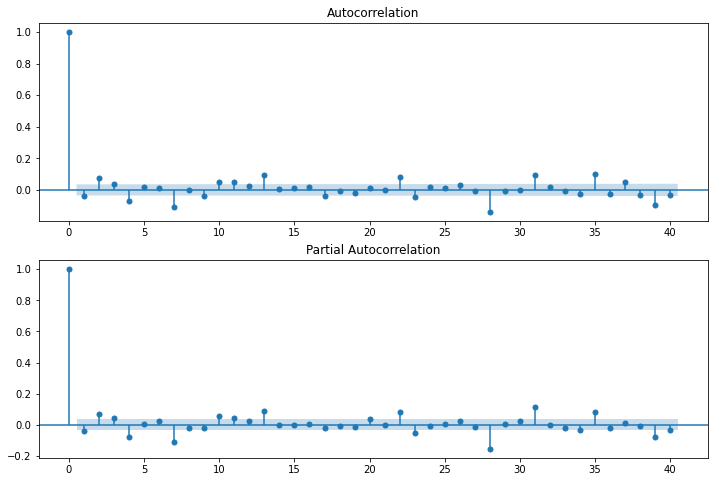

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig =sm.graphics.tsa.plot_acf(df['Close_first_diff'].dropna(), lags = 40, ax = ax1)

ax2 = fig.add_subplot(212)
fig =sm.graphics.tsa.plot_pacf(df['Close_first_diff'].dropna(), lags = 40, ax = ax2)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [36]:
model = ARIMA(df['Close'].dropna(), order = (1,1,1))
model_fit = model.fit()

C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3100
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10469.931
Method:                       css-mle   S.D. of innovations              7.088
Date:                Sun, 25 Jul 2021   AIC                          20947.862
Time:                        12:36:22   BIC                          20972.019
Sample:                    01-03-2013   HQIC                         20956.537
                         - 06-29-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2174      0.123      1.770      0.077      -0.023       0.458
ar.L1.D.Close    -0.3909      0.151     -2.586      0.010      -0.687      -0.095
ma.L1.D.Close     0.3418      0.154      2.224      0.026       0.041       0.643
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5583           +0.0000j            2.5583            0.5000
MA.1           -2.9259           +0.0000j            2.9259            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

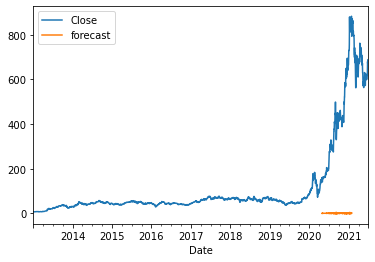

In [38]:
df['forecast'] = model_fit.predict(start = '2020-04-28', end = '2021-01-29' )
df[['Close', 'forecast']].plot()

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,5))

In [40]:
results=model.fit()

In [41]:
import datetime

<AxesSubplot:xlabel='Date'>

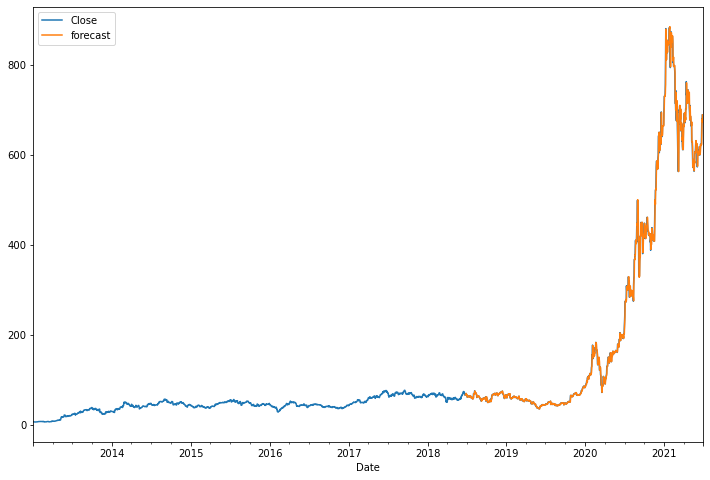

In [42]:
df['forecast']=results.predict(start=2000, end = 3098)

df[['Close','forecast']].plot(figsize=(12,8))

In [62]:
df.tail(15)

,Open,High,Low,Close,Volume,Close_first_diff,forecast
Date,,,,,,,
2021-06-15,616.690002,616.789978,598.229980,599.359985,17764100,-18.330017,617.737631
2021-06-16,597.539978,608.500000,593.500000,604.869995,22144100,5.510010,600.853656
2021-06-17,601.890015,621.469971,601.340027,616.599976,22701400,11.729981,605.155601
2021-06-18,613.369995,628.349976,611.799988,623.309998,24560900,6.710022,616.286183
2021-06-19,624.479980,631.390015,608.880005,620.830017,24812700,-2.479981,623.546647
2021-06-20,624.479980,631.390015,608.880005,620.830017,24812700,0.000000,620.560615
2021-06-21,624.479980,631.390015,608.880005,620.830017,24812700,0.000000,621.425698
2021-06-22,618.250000,628.570007,615.500000,623.710022,19158900,2.880005,621.864604
2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200,32.859985,623.740151


In [44]:
from pandas.tseries.offsets import DateOffset 

In [45]:
forcasting_dates = [df.index[-1] + DateOffset(days =x) for x in range(0,50)]

In [46]:
future_df2 = pd.DataFrame(index = forcasting_dates[-50:], columns = df.columns)

In [47]:
future_df3 = pd.concat([df, future_df2]) 

In [49]:
future_df3.tail(10)

,Open,High,Low,Close,Volume,Close_first_diff,forecast
2021-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
future_df3['forecast'] = results.predict(start = 2000, end = 3240)

In [59]:
X_train = future_df3.Close[2000:3098]

In [60]:
future_df3['forecast']

2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-05           NaN
2013-01-06           NaN
                 ...    
2021-08-13    698.210126
2021-08-14    698.006535
2021-08-15    698.679764
2021-08-16    699.460533
2021-08-17    699.617345
Name: forecast, Length: 3151, dtype: float64

<AxesSubplot:>

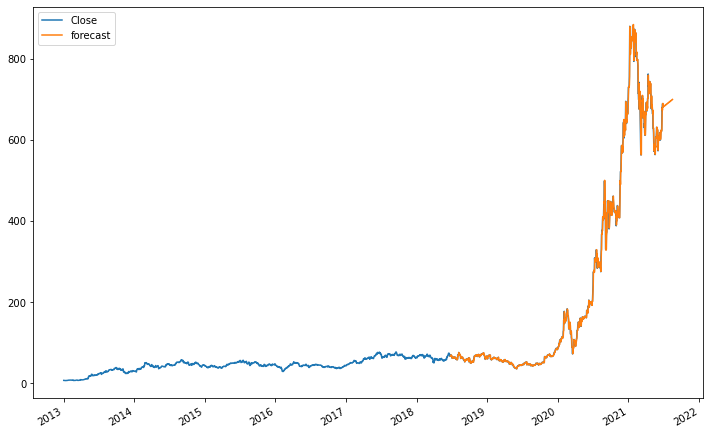

In [53]:
future_df3[['Close', 'forecast']].plot(figsize = (12,8))

In [54]:
future_df3[-30:]

,Open,High,Low,Close,Volume,Close_first_diff,forecast
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,688.694913
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,688.491322
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,689.164551
2021-07-22,NaN,NaN,NaN,NaN,NaN,NaN,689.945320
2021-07-23,NaN,NaN,NaN,NaN,NaN,NaN,690.102132
2021-07-24,NaN,NaN,NaN,NaN,NaN,NaN,690.597956
2021-07-25,NaN,NaN,NaN,NaN,NaN,NaN,690.394365
2021-07-26,NaN,NaN,NaN,NaN,NaN,NaN,691.067593
2021-07-27,NaN,NaN,NaN,NaN,NaN,NaN,691.848363
2021-07-28,NaN,NaN,NaN,NaN,NaN,NaN,692.005174


In [4]:
import tensorflow as tf
keras = tf.keras

In [57]:
X_train

2018-06-25    66.601997
2018-06-26    68.400002
2018-06-27    68.900002
2018-06-28    69.986000
2018-06-29    68.589996
                ...    
2021-08-13          NaN
2021-08-14          NaN
2021-08-15          NaN
2021-08-16          NaN
2021-08-17          NaN
Name: Close, Length: 1151, dtype: float64

In [61]:
keras.metrics.mean_absolute_error(X_train, future_df3['forecast'][2000:3098]).numpy()

5.296286517590334

## Neural Network Models

In [66]:
import math

In [78]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [63]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [64]:
series1 = np.array(df.Close)
time = np.array(df.index[-1]-df.index[0])

In [67]:
time = np.arange(len(series1))
split_time = math.ceil(len(series1)*0.7)

In [68]:
len(series1), len(time)

(3101, 3101)

In [69]:
time_train = time[:split_time]
x_train = series1[:split_time]
time_valid = time[split_time:]
x_valid = series1[split_time:]

In [70]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [72]:
tf.random.set_seed(42)
np.random.seed(42)

In [73]:
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

In [74]:
model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

In [75]:
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [76]:
early_stopping = keras.callbacks.EarlyStopping(patience=15)
model.fit(train_set, epochs=200,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/200
67/67 [==============================] - 2s 15ms/step - loss: 17.5119 - mae: 18.0028 - val_loss: 26.5567 - val_mae: 27.0426
Epoch 2/200
67/67 [==============================] - 1s 8ms/step - loss: 2.1643 - mae: 2.6156 - val_loss: 24.4118 - val_mae: 24.8961
Epoch 3/200
67/67 [==============================] - 1s 7ms/step - loss: 1.9157 - mae: 2.3596 - val_loss: 22.5994 - val_mae: 23.0843
Epoch 4/200
67/67 [==============================] - 1s 7ms/step - loss: 1.7930 - mae: 2.2397 - val_loss: 21.2479 - val_mae: 21.7324
Epoch 5/200
67/67 [==============================] - 1s 7ms/step - loss: 1.6491 - mae: 2.0861 - val_loss: 20.3177 - val_mae: 20.8004
Epoch 6/200
67/67 [==============================] - 1s 7ms/step - loss: 1.6117 - mae: 2.0444 - val_loss: 18.6980 - val_mae: 19.1775
Epoch 7/200
67/67 [==============================] - 1s 7ms/step - loss: 1.4261 - mae: 1.8571 - val_loss: 17.3316 - val_mae: 17.8111
Epoch 8/200
67/67 [==============================] - 1s 7ms/step -

67/67 [==============================] - 0s 5ms/step - loss: 0.6020 - mae: 0.9713 - val_loss: 9.5918 - val_mae: 10.0507
Epoch 63/200
67/67 [==============================] - 0s 4ms/step - loss: 0.6467 - mae: 1.0223 - val_loss: 9.4194 - val_mae: 9.8833
Epoch 64/200
67/67 [==============================] - 0s 5ms/step - loss: 0.6704 - mae: 1.0494 - val_loss: 9.5181 - val_mae: 9.9760
Epoch 65/200
67/67 [==============================] - 1s 6ms/step - loss: 0.7194 - mae: 1.1032 - val_loss: 9.2097 - val_mae: 9.6699
Epoch 66/200
67/67 [==============================] - 0s 5ms/step - loss: 0.6144 - mae: 0.9848 - val_loss: 9.2598 - val_mae: 9.7160
Epoch 67/200
67/67 [==============================] - 0s 5ms/step - loss: 0.6399 - mae: 1.0133 - val_loss: 9.1753 - val_mae: 9.6323
Epoch 68/200
67/67 [==============================] - 0s 4ms/step - loss: 0.6237 - mae: 0.9936 - val_loss: 9.2287 - val_mae: 9.6902
Epoch 69/200
67/67 [==============================] - 0s 4ms/step - loss: 0.6417 - mae: 

Epoch 124/200
67/67 [==============================] - 0s 4ms/step - loss: 0.5749 - mae: 0.9362 - val_loss: 9.4522 - val_mae: 9.9200
Epoch 125/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5719 - mae: 0.9400 - val_loss: 8.3599 - val_mae: 8.8042
Epoch 126/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5908 - mae: 0.9490 - val_loss: 8.5729 - val_mae: 9.0265
Epoch 127/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5413 - mae: 0.8979 - val_loss: 8.5387 - val_mae: 8.9953
Epoch 128/200
67/67 [==============================] - 0s 4ms/step - loss: 0.5646 - mae: 0.9225 - val_loss: 8.8649 - val_mae: 9.3270
Epoch 129/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5572 - mae: 0.9169 - val_loss: 8.5363 - val_mae: 8.9932
Epoch 130/200
67/67 [==============================] - 0s 4ms/step - loss: 0.5991 - mae: 0.9678 - val_loss: 9.1714 - val_mae: 9.6415
Epoch 131/200
67/67 [==============================] - 0s 5ms/step - 

67/67 [==============================] - 0s 5ms/step - loss: 0.5123 - mae: 0.8618 - val_loss: 8.9058 - val_mae: 9.3709
Epoch 186/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5232 - mae: 0.8770 - val_loss: 8.1687 - val_mae: 8.6183
Epoch 187/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5256 - mae: 0.8804 - val_loss: 8.2686 - val_mae: 8.7223
Epoch 188/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5036 - mae: 0.8524 - val_loss: 8.1480 - val_mae: 8.5966
Epoch 189/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5433 - mae: 0.9004 - val_loss: 8.0793 - val_mae: 8.5269
Epoch 190/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5118 - mae: 0.8602 - val_loss: 7.9245 - val_mae: 8.3685
Epoch 191/200
67/67 [==============================] - 0s 5ms/step - loss: 0.5012 - mae: 0.8501 - val_loss: 8.1839 - val_mae: 8.6345
Epoch 192/200
67/67 [==============================] - 0s 4ms/step - loss: 0.5143 -

In [77]:
dense_forecast = model_forecast(
    model,
    series1[split_time - window_size:-1],
    window_size)[:, 0]

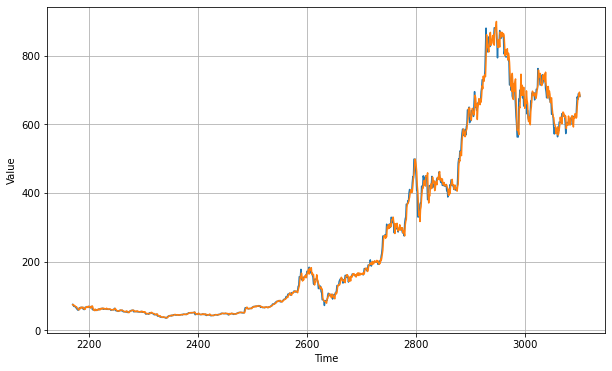

In [79]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dense_forecast)

In [80]:
keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

8.073329